**RITESH KUMAR PANDEY**

**Experiment 1A: Study of Different Distributions**

In [ ]:
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

**1. Gaussian Distribution**
- Also called Normal Distribution
- The two major parameters to know are mean & standard deviation
- Mean, Median & Mode for such distribution are equal (for perfectly Normal Distribution)
- The area under the curve is always 1

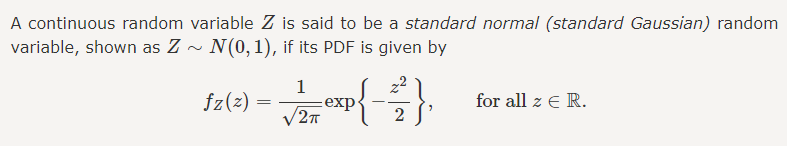

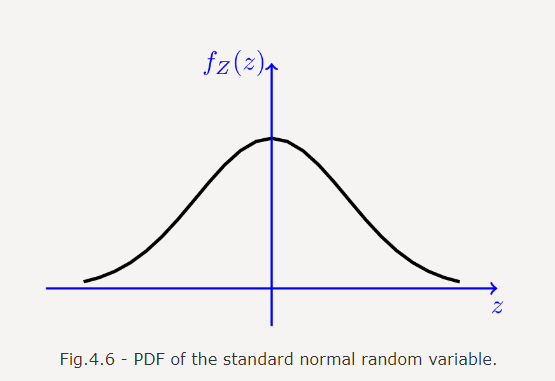

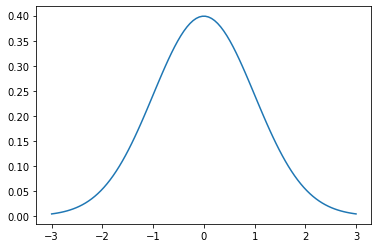

In [ ]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

**2. Bernoulli’s Distribution**
The distribution has following characteristics:
- The number of trials, to be performed, need to be predefined for a single experiment.
- Each trial has only two possible outcomes-success or failure.
- The probability of success of each event/experiment must be the same.
- Each event must be independent of each other.

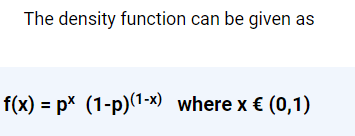

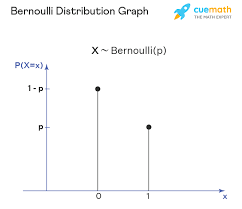

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Bernouli')]

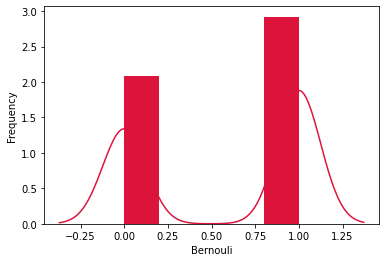

In [ ]:
data_bern = stats.bernoulli.rvs(size=1000,p=0.6)
ax = sns.distplot(data_bern,
                  kde=True,
                  color='crimson',
                  hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Bernouli', ylabel='Frequency')

**3. Binomial Distribution**
- The binomial distribution is applied in binary outcomes events where the probability of success is equal to the probability of failure in all the successive trials. 
- Its example includes tossing a biased/unbiased coin for a repeated number of times.
- As input, the distribution considers two parameters, and is thus called as bi-parametric distribution. 
- The two parameters are:
-- The number of times an event occurs, n, and
-- Assigned probability, p, to one of the two classes
- When success and failure are equally likely, the binomial distribution is a normal distribution. Hence, changing the value of p to 0.5, we obtain graph, which is identical to a normal distribution plot

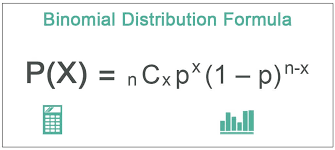



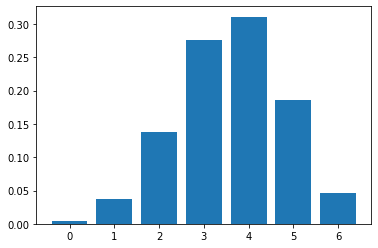

In [ ]:
n = 6
p = 0.6
# defining list of r values
r_values = list(range(n + 1))
# list of pmf values
dist = [stats.binom.pmf(r, n, p) for r in r_values ]
# plotting the graph 
plt.bar(r_values, dist)
plt.show()

**4. Poisson Distribution**
- Poisson distribution outlines the probability for a given number of events that take place in a fixed time period or space, or particularized intervals such as distance, area, volume.
- Poisson distribution considers following assumptions:
-- The success probability for a short span is equal to success probability for 
a long period of time.
-- The success probability in a duration equals to zero as the duration becomes smaller.
-- A successful event can’t impact the result of another successful event

- A very important property for Exponential Distribution:
-- ***Memorylessness Property:***
It usually refers to the ideology that the future success doesn’t depend on the past elapsed time i.e. if you have lost past 10 tosses, it doesn’t increase/decrease your chances of winning/losing the 11th toss!

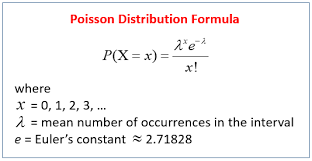



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


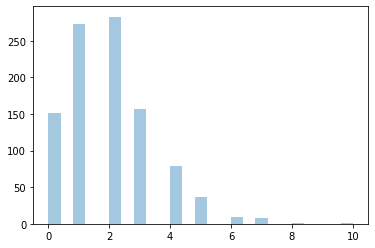

In [ ]:
sns.distplot(np.random.poisson(lam=2, size=1000), kde=False)
plt.show()

**Difference Between Normal and Poisson Distribution**
Normal distribution is continous whereas poisson is discrete.

But we can see that similar to binomial for a large enough poisson distribution it will become similar to normal distribution with certain std dev and mean.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


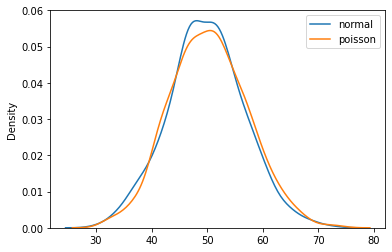

In [ ]:
sns.distplot(np.random.normal(loc=50, scale=7, size=1000), hist=False, label='normal')
sns.distplot(np.random.poisson(lam=50, size=1000), hist=False, label='poisson')
plt.legend()
plt.show()

**Difference Between Poisson and Binomial Distribution**
The difference is very subtle it is that, binomial distribution is for discrete trials, whereas poisson distribution is for continuous trials.

But for very large n and near-zero p binomial distribution is near identical to poisson distribution such that n * p is nearly equal to lam.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


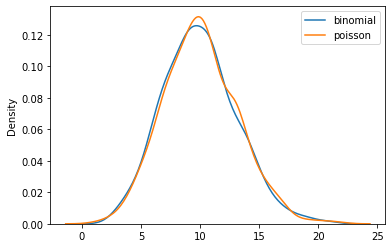

In [ ]:
sns.distplot(np.random.binomial(n=1000, p=0.01, size=1000), hist=False, label='binomial')
sns.distplot(np.random.poisson(lam=10, size=1000), hist=False, label='poisson')
plt.legend()
plt.show()

**5. Exponential Distribution**
- it gives the probability of a time duration before an event takes place
- The Exponential distribution is related to the Poisson distribution. Where the Poisson distribution describes the number of events per unit time, the exponential distribution describes the waiting time between events.

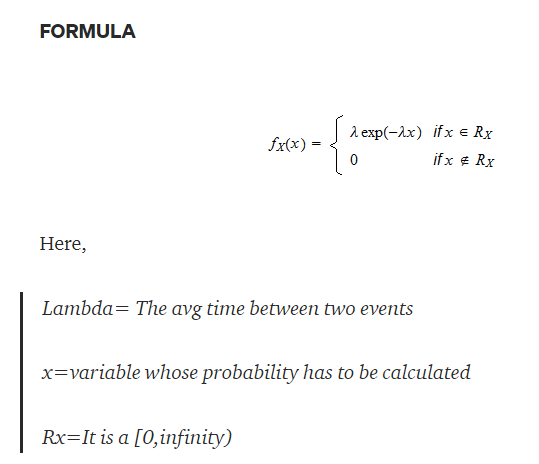

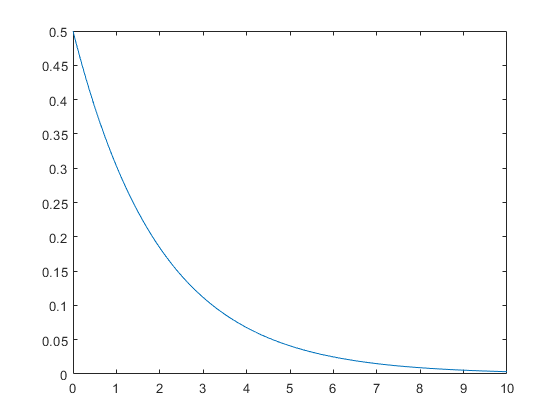

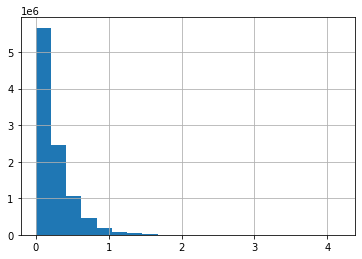

In [ ]:
lam = 4 # event rate of customers coming in per unit time
n_simulated = 10000000

random_waiting_times = stats.expon(scale = 1 / lam).rvs(n_simulated)
pd.Series(random_waiting_times).hist(bins = 20)

**Experiment 1B: To implement Goodness of Fit**

**KS Test**
- KS stands for "Kolmogorov-Smirnov"
- This test is used in situations where a comparison has to be made between an observed sample distribution and theoretical distribution.
- The Kolmogorov-Smirnov Goodness of Fit Test (K-S test) compares your data with a known distribution and lets you know if they have the same distribution.
- As per Wikipedia, "The Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples."
- In probability theory and statistics, the cumulative distribution function (CDF) of a real-valued random variable , or just distribution function of , evaluated at , is the probability that will take a value less than or equal to.
- An empirical cumulative distribution function (also called the empirical distribution function, ECDF, or just EDF) and a cumulative distribution function are basically the same thing: they are both probability models for data. However, while a CDF is a hypothetical model of a distribution, the ECDF models empirical (i.e. observed) data.
---

**KS One Sample Test:**
This test is used as a test of goodness of fit and is ideal when the size of the sample is small. It compares the cumulative distribution function for a variable with a specified distribution. ***The null hypothesis assumes no difference between the observed and theoretical distribution*** and the value of test statistic 'D' is calculated as:

**Formula** <br>
D = Maximum|Fo(X)−Fr(X)|
Where,
- Fo(X) = Observed cumulative frequency distribution of a random sample of n observations.
- Fo(X)=kn = (No.of observations ≤ X)/(Total no.of observations).
- Fr(X) = The theoretical frequency distribution.

*The critical value of D is found from the K-S table values for one sample test.*

**Acceptance Criteria:** If calculated value is less than critical value accept null hypothesis.

**Rejection Criteria:** If calculated value is greater than table value reject null hypothesis.

---
**KS Two Sample Test:**
When instead of one, there are two independent samples then K-S two sample test can be used to test the agreement between two cumulative distributions. The null hypothesis states that there is no difference between the two distributions. The D-statistic is calculated in the same manner as the K-S One Sample Test.

**Formula**
D = Maximum|Fn1(X)−Fn2(X)|
Where,
- n1 = Observations from first sample.
- n2 = Observations from second sample.

<br>

It has been seen that when the cumulative distributions show large maximum deviation |D| it is indicating towards a difference between the two sample distributions.

The critical value of D for samples where n1=n2 and is ≤ 40, the K-S table for two sample case is used. When n1 and/or n2 > 40 then the K-S table for large samples of two sample test should be used. The null hypothesis is accepted if the calculated value is less than the table value and vice-versa.

---
**General Steps:**
The general steps to run the test are:
1. Create an EDF for your sample data (see Empirical Distribution Function for steps),
2. Specify a parent distribution (i.e. one that you want to compare your EDF to)
3. Graph the two distributions together.
4. Measure the greatest vertical distance between the two graphs.
5. Calculate the test statistic.
6. Find the critical value in the KS table.
7. Compare to the critical value.

---
**Advantages and Disadvantages** <br>
Advantages include:
- The test is distribution free. That means you don’t have to know the underlying population distribution for your data before running this test.
- The D statistic (not to be confused with Cohen’s D) used for the test is easy to calculate.
- It can be used as a goodness of fit test following regression analysis.
- There are no restrictions on sample size; Small samples are acceptable.
- Tables are readily available.


Although the K-S test has many advantages, it also has a few limitations:

- In order for the test to work, you must specify the location, scale, and shape parameters. If these parameters are estimated from the data, it invalidates the test. If you don’t know these parameters, you may want to run a less formal test (like the one outlined in the empirical distribution function article).
- It generally can’t be used for discrete distributions, especially if you are using software (most software packages don’t have the necessary extensions for discrete K-S Test and the manual calculations are convoluted).
- Sensitivity is higher at the center of the distribution and lower at the tails.

In [ ]:
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
stats.kstest(x, "norm")

KstestResult(statistic=0.9972943174290896, pvalue=0.0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


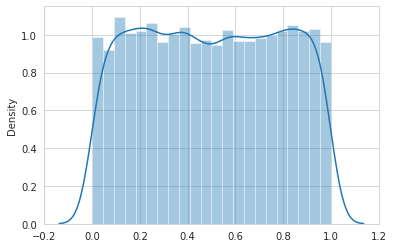

In [ ]:
# Generate 1000 points from the normal distrbution
rvs = stats.uniform.rvs(size=10000)
sns.set_style('whitegrid')
# sns.kdeplot(rvs)
sns.distplot(rvs)
plt.show()

In [ ]:
def distribution(name_of_distribution):
  print('Distribution: ', name_of_distribution)
  try:
    print(stats.kstest(rvs, name_of_distribution))
  except:
    print('Exception occured')
  finally:
    print('\n')

In [ ]:
distributions = ['uniform', 'norm', 'cosine', 'expon']
for i in distributions:
  distribution(i)

Distribution:  uniform
KstestResult(statistic=0.005757014883936484, pvalue=0.8927702632464205)


Distribution:  norm
KstestResult(statistic=0.5000082368638289, pvalue=0.0)


Distribution:  cosine
KstestResult(statistic=0.5000065720664788, pvalue=0.0)


Distribution:  expon
KstestResult(statistic=0.36798623666665264, pvalue=0.0)




**Chi-Square Goodness of Fit Test**
- The Chi-square goodness of fit test is a statistical hypothesis test used to determine whether a variable is likely to come from a specified distribution or not. 
- It is often used to evaluate whether sample data is representative of the full population.
- Chi-Square goodness of fit test is a non-parametric test that is used to find out how the observed value of a given phenomena is significantly different from the expected value.
- In Chi-Square goodness of fit test, the term goodness of fit is used to compare the observed sample distribution with the expected probability distribution.  
- Chi-Square goodness of fit test determines how well theoretical distribution (such as normal, binomial, or Poisson) fits the empirical distribution. 
- In Chi-Square goodness of fit test, sample data is divided into intervals. Then the numbers of points that fall into the interval are compared, with the expected numbers of points in each interval.

---
**Hypothesis**
- Null Hypothesis: In Chi-Square goodness of fit test, the null hypothesis assumes that *there is no significant difference between the observed and the expected value*.
- Alternate Hypothesis: In Chi-Square goodness of fit test, the alternative hypothesis assumes that *there is a significant difference between the observed and the expected value*.

---
The test statistic for the chi-square (Χ2) goodness of fit test is Pearson’s chi-square:

Formula	Explanation
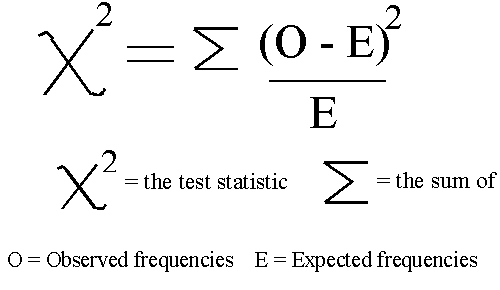

---
**Hypothesis Testing**
- If the calculated value of Chi-Square Goodness of Fit is greater than the table value, we reject the null hypothesis and conclude that there is a significant difference between the observed and the expected frequency.
- If the calculated value of Chi-Square Goodness of Fit is less than the table value, we accept the null hypothesis and conclude that there is no significant difference between the observed and the expected frequency.

In [1]:
from scipy import stats
import pandas as pd
import numpy as np

In [2]:
observed_data = [8, 6, 10, 7, 8, 11, 9]
expected_data = [9, 8, 11, 8, 10, 7, 6]
  
  
# Chi-Square Goodness of Fit Test
chi_square_test_statistic, p_value = stats.chisquare(observed_data, expected_data)
  
# chi square test statistic and p value
print('chi_square_test_statistic is : ' +
      str(chi_square_test_statistic))
print('p_value : ' + str(p_value))

chi_square_test_statistic is : 5.0127344877344875
p_value : 0.542180861413329


In [3]:
if (chi_square_test_statistic < p_value):
  print('We Accept the Null hypothesis, No Significant difference between expected values and observed values')
else:
  print('We Reject the Null hupothesis, Significant difference between expected values and observed values')

We Reject the Null hupothesis, Significant difference between expected values and observed values
